# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane report the smallest Final Tumor Volume (mm3)'s, indicating these are the most effective treatments (see Box Plot) 

- There is a high correlation between mouse weight and average tumor volume (0.84). Looking at the scatter plot with linear regression, we see a direct linear relationship between these two variables: as mouse weight increases, average tumor weight increases. 

- On the line plot of tumor volume vs. time point for a mouse treated with Capomulin, there is a slight growth in tumor volume between days 35 and 45. Longer time data would be useful here to look at the effects of Capomulin on tumor volume past day 45 to see if it would still be more effective than other treatments over the long run. 



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])

# Display the data table for preview
study_data_complete.head()

# Checking the number of mice.
number_mice = study_data_complete['Mouse ID'].nunique()
number_mice

249

In [2]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = study_data_complete.loc[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicates
#ASK

array(['g989'], dtype=object)

In [3]:
# Optional: Get all the data for the duplicate mouse ID. 


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = study_data_complete[study_data_complete['Mouse ID'].isin(duplicates)==False]
#clean_df = study_data_complete.drop_duplicates(['Mouse ID'], keep='first') [ASK]
clean_df.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [5]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_tumor_vol = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_tumor_vol = clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
var_tumor_vol = clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
sd_tumor_vol = clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem_tumor_vol = clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.
stats_summary = pd.DataFrame({"Mean Tumor Volume": mean_tumor_vol, 
                                 "Median Tumor Volume": median_tumor_vol,
                                 "Tumor Volume Variance": var_tumor_vol,
                                 "Tumor Volume Std. Dev.": sd_tumor_vol,
                                 "Tumor Volume Std. Err.": sem_tumor_vol,
                                })

stats_summary

/var/folders/x8/dv5n_lms4wv3j76gkj91t2lw0000gn/T/ipykernel_71639/1568603267.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_tumor_vol = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
/var/folders/x8/dv5n_lms4wv3j76gkj91t2lw0000gn/T/ipykernel_71639/1568603267.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_tumor_vol = clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
/var/folders/x8/dv5n_lms4wv3j76gkj91t2lw0000gn/T/ipykernel_71639/1568603267.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version,

Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.622085                0.544332  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
agg_df = clean_df.groupby(["Drug Regimen"])
agg_df = agg_df.agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]
agg_df

/var/folders/x8/dv5n_lms4wv3j76gkj91t2lw0000gn/T/ipykernel_71639/4140059920.py:6: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  agg_df = agg_df.agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]


mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

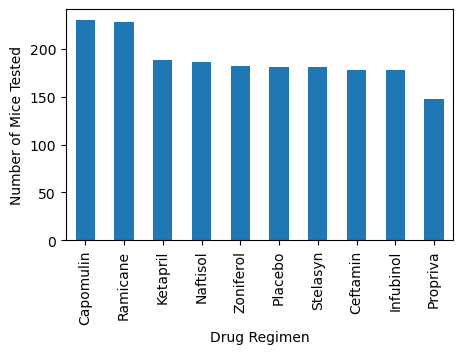

<Figure size 640x480 with 0 Axes>

In [8]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_tested = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"].sort_values(ascending=False)
mice_tested

bar_plot = mice_tested.plot(kind='bar', figsize=(5,3))

# Set the xlabel and ylabel using class methods
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Mice Tested")

plt.show()
plt.tight_layout()

In [9]:
mice_tested

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Mouse ID, dtype: int64

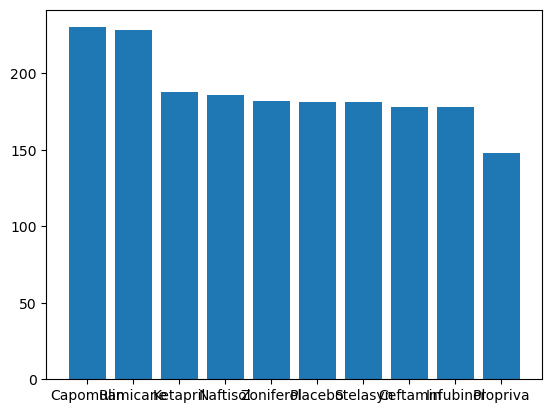

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.


plt.bar(mice_tested.index.values, mice_tested.values)

plt.show()

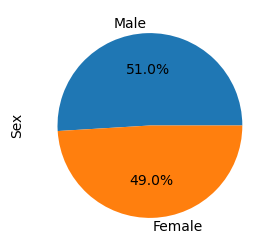

<Figure size 640x480 with 0 Axes>

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = clean_df.groupby(["Sex"]).count()["Mouse ID"].sort_values(ascending=False)
mice_sex
pie_plot = mice_sex.plot(kind='pie', figsize=(5,3), autopct='%1.1f%%')

pie_plot.set_ylabel("Sex")

plt.show()
plt.tight_layout()

In [12]:
mice_sex.values

array([958, 922])

Text(0, 0.5, 'Sex')

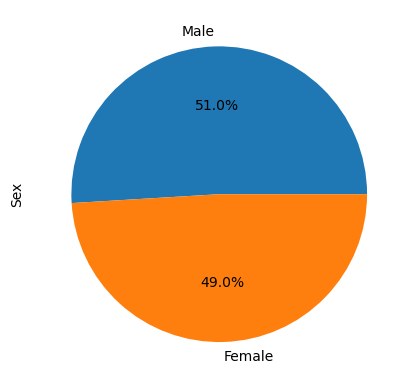

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(mice_sex.values,labels=mice_sex.index.values,autopct='%1.1f%%');
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse (series of Mouse ID and Timepoint)   
max_time = clean_df.groupby('Mouse ID').max()['Timepoint']

# Convert to a Data Frame (Reset the Index)
max_time = max_time.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_df = pd.merge(max_time, clean_df, on=("Mouse ID","Timepoint"),how="left")
tumor_df

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0       a203         45           67.973419                 2    Infubinol   
1       a251         45           65.525743                 1    Infubinol   
2       a262         45           70.717621                 4      Placebo   
3       a275         45           62.999356                 3     Ceftamin   
4       a366         30           63.440686                 1     Stelasyn   
..       ...        ...                 ...               ...          ...   
243     z435         10           48.710661                 0     Propriva   
244     z578         45           30.638696                 0     Ramicane   
245     z581         45           62.754451                 3    Infubinol   
246     z795         45           65.741070                 3     Naftisol   
247     z969         45           73.867845                 4     Naftisol   

        Sex  Age_months  Weight (g)  
0    Female          20          23  
1    Female          21          25  
2    Female          17          29  
3    Female          20          28  
4    Female          16          29  
..      ...         ...         ...  
243  Female          12          26  
244    Male          11          16  
245  Female          24          25  
246  Female          13          29  
247    Male           9          30  

[248 rows x 8 columns]

In [15]:
# Put the four treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

    # list_of_treatment_data  = [ [list of treatment 1 data], [list of treatment 2 data], [list of treatment 3 data], [list of treatment4  data]   ]`    
list_of_treatment_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes

for treatment in treatments:
    tumor_vol = tumor_df.loc[tumor_df["Drug Regimen"] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    list_of_treatment_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds (ASK)

    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = tumor_vol.loc[(tumor_vol<lower_bound) | (tumor_vol>upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")
    #print(f"Values above {upper_bound} could be outliers.")
                            

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


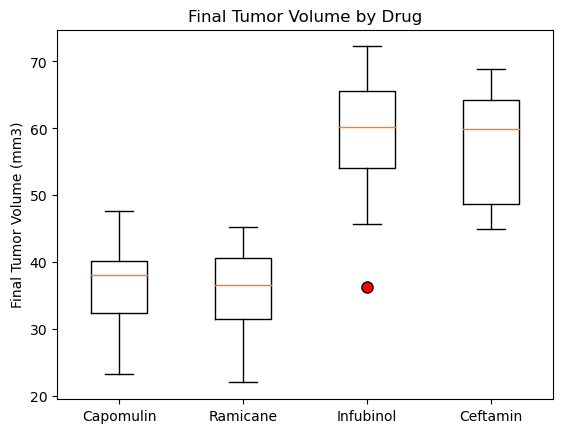

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Edit outliers on boxplot for visibility
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

# Plot boxplot
plt.boxplot(list_of_treatment_data, flierprops=flierprops)

# Add title and labels to boxplot
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

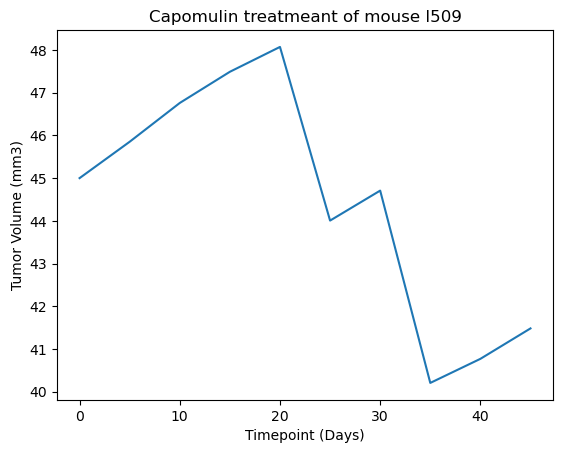

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_df = clean_df.loc[clean_df["Mouse ID"] == "l509",:]

x_axis = line_df["Timepoint"]
tum_vol = line_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tum_vol)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

/var/folders/x8/dv5n_lms4wv3j76gkj91t2lw0000gn/T/ipykernel_71639/957447342.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", :].groupby("Mouse ID").mean()


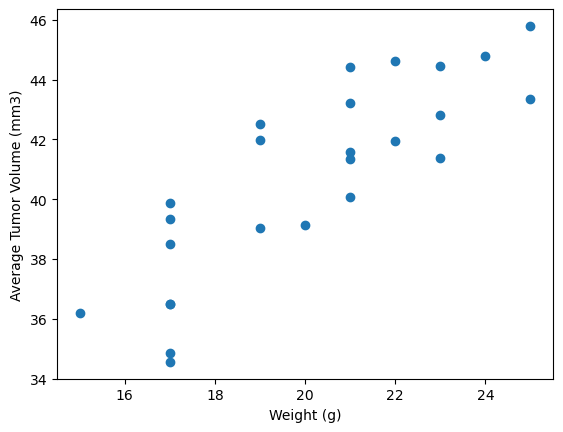

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", :].groupby("Mouse ID").mean()
capomulin_df 

plt.scatter(capomulin_df ['Weight (g)'],capomulin_df ['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr = st.pearsonr(capomulin_df['Weight (g)'], capomulin_df['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and average tumor volume is {round(corr[0],2)}")

The correlation between mouse weight and average tumor volume is 0.84


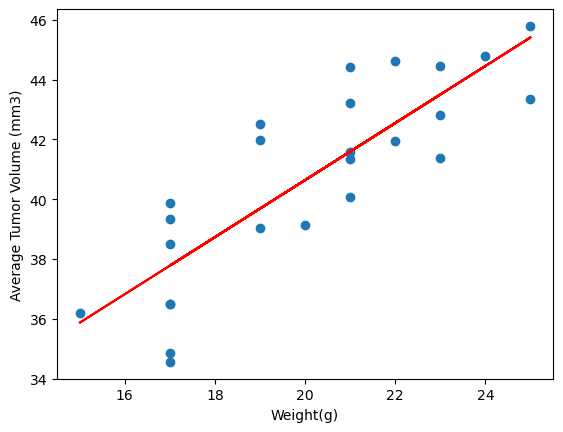

In [20]:
model = st.linregress(capomulin_df['Weight (g)'], capomulin_df['Tumor Volume (mm3)'])
model

x_values = capomulin_df['Weight (g)']

# regression_value = x_value * slope + intercept
regress_values = x_values * model[0] + model[1]

plt.scatter(capomulin_df['Weight (g)'],capomulin_df['Tumor Volume (mm3)'])
plt.plot(x_values, regress_values, color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()